In [1]:
import pandas as pd
import xgboost as xgb

In [2]:
df = pd.read_csv('range12-02.csv', index_col=[0], parse_dates=[0])

In [3]:
target_variable = '1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U'

In [4]:
df

,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD101_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD102_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD103_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD104_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD105_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD106_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD201_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD202_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD203_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD204_Weight,...,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/CurrentControl.QMAN_AUT,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/CurrentControl.SP,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.LMN,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.PV_IN,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QLMN_HLM,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QLMN_LLM,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QMAN_AUT,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.SP,1023-119-201-PULO-0001-SER_SAF1MHS_34/H_ZB002_YGM01/BstFanCntDmp_POS.POS_MON,1023-119-201-PULO-0001-SER_SAF1MHS_34/H_ZB003_YGM01/BstFanShtDmp_POS.POS_MON
Time,,,,,,,,,,,,,,,,,,,,,
2023-12-01 00:00:01,226.246094,-3.287109,2808.753906,2877.917969,460.722656,760.378906,-0.528320,-1.446289,23.167969,0.179688,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2023-12-01 00:05:01,258.098633,-4.272461,1061.740234,1492.082031,471.114258,570.111328,-0.300781,-1.628906,21.671875,-0.019531,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2023-12-01 00:10:01,2.067383,2.208984,982.056641,928.972656,11.234375,9.035156,-0.552734,-1.843750,21.162109,-0.316406,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2023-12-01 00:15:01,249.838867,-6.811523,2919.685547,2962.314453,481.719727,825.514648,-0.526367,-1.524414,22.800781,-0.199219,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2023-12-01 00:20:01,175.117188,-1.657227,504.699219,716.810547,225.417969,325.849609,202.318359,-5.761719,1467.402344,716.607422,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-10 23:40:01,1.664062,5.760742,374.476562,-0.861328,9.947266,-6.519531,228.268555,-7.868164,1452.734375,0.417969,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-02-10 23:45:01,1.664062,5.760742,374.476562,-0.861328,9.947266,-6.519531,228.268555,-7.868164,1452.734375,0.417969,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-02-10 23:50:01,1.664062,5.760742,374.476562,-0.861328,9.947266,-6.519531,228.268555,-7.868164,1452.734375,0.417969,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN


In [5]:
df.sort_index(axis=0, ascending=True, inplace=True)

In [6]:
df

,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD101_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD102_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD103_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD104_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD105_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD106_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD201_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD202_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD203_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD204_Weight,...,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/CurrentControl.QMAN_AUT,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/CurrentControl.SP,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.LMN,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.PV_IN,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QLMN_HLM,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QLMN_LLM,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QMAN_AUT,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.SP,1023-119-201-PULO-0001-SER_SAF1MHS_34/H_ZB002_YGM01/BstFanCntDmp_POS.POS_MON,1023-119-201-PULO-0001-SER_SAF1MHS_34/H_ZB003_YGM01/BstFanShtDmp_POS.POS_MON
Time,,,,,,,,,,,,,,,,,,,,,
2023-12-01 00:00:01,226.246094,-3.287109,2808.753906,2877.917969,460.722656,760.378906,-0.528320,-1.446289,23.167969,0.179688,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2023-12-01 00:05:01,258.098633,-4.272461,1061.740234,1492.082031,471.114258,570.111328,-0.300781,-1.628906,21.671875,-0.019531,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2023-12-01 00:10:01,2.067383,2.208984,982.056641,928.972656,11.234375,9.035156,-0.552734,-1.843750,21.162109,-0.316406,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2023-12-01 00:15:01,249.838867,-6.811523,2919.685547,2962.314453,481.719727,825.514648,-0.526367,-1.524414,22.800781,-0.199219,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2023-12-01 00:20:01,175.117188,-1.657227,504.699219,716.810547,225.417969,325.849609,202.318359,-5.761719,1467.402344,716.607422,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-10 23:40:01,1.664062,5.760742,374.476562,-0.861328,9.947266,-6.519531,228.268555,-7.868164,1452.734375,0.417969,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-02-10 23:45:01,1.664062,5.760742,374.476562,-0.861328,9.947266,-6.519531,228.268555,-7.868164,1452.734375,0.417969,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-02-10 23:50:01,1.664062,5.760742,374.476562,-0.861328,9.947266,-6.519531,228.268555,-7.868164,1452.734375,0.417969,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN


<Axes: xlabel='Time'>

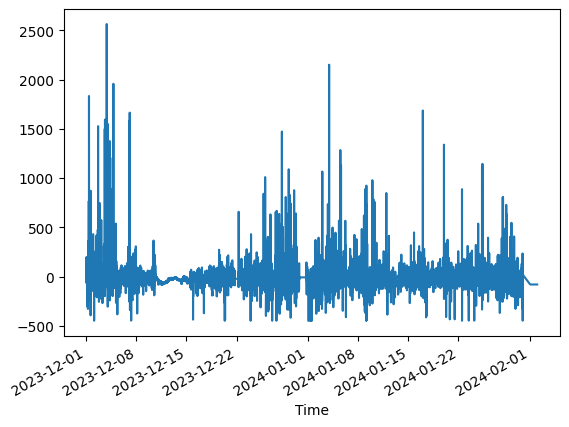

In [7]:
begin_date = '01-Dec-2023'
end_date = '02-Feb-2024'

overpressure_1 = df[target_variable]
overpressure_1.loc[(overpressure_1.index > begin_date) & (overpressure_1.index <= end_date)].plot()

<Axes: xlabel='Time'>

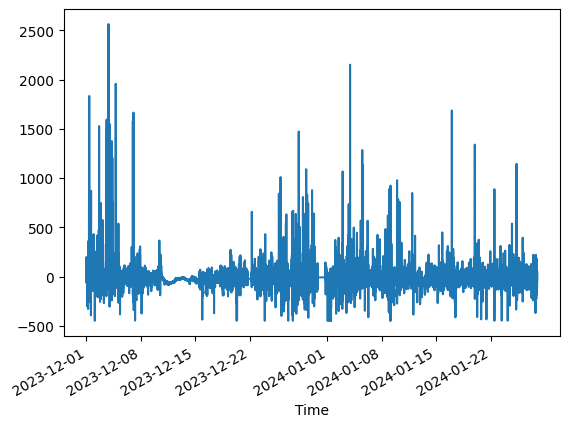

In [8]:
split_date = '28-Jan-2024'

df = df.loc[df.index <= split_date].copy()
df[target_variable].plot()

In [9]:
df.tail(50)

,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD101_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD102_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD103_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD104_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD105_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_1.DD106_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD201_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD202_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD203_Weight,1023-112-201-PBUN-0001-MHS/HMI_WEIGH_T_2.DD204_Weight,...,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/CurrentControl.QMAN_AUT,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/CurrentControl.SP,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.LMN,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.PV_IN,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QLMN_HLM,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QLMN_LLM,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.QMAN_AUT,1023-119-201-PULO-0001-MHS/H_ZB002_PID_control/PressControl.SP,1023-119-201-PULO-0001-SER_SAF1MHS_34/H_ZB002_YGM01/BstFanCntDmp_POS.POS_MON,1023-119-201-PULO-0001-SER_SAF1MHS_34/H_ZB003_YGM01/BstFanShtDmp_POS.POS_MON
Time,,,,,,,,,,,,,,,,,,,,,
2024-01-27 19:50:01,219.210938,-8.307617,2628.628906,2575.589844,256.554688,777.626953,255.950195,-16.386719,2993.667969,3056.263672,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-27 19:55:01,0.458984,-0.985352,1.935547,-6.320312,6.025391,-15.160156,-0.199219,-1.142578,14.347656,35.140625,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-27 20:00:01,0.713867,-0.953125,-11.365234,-24.462891,4.580078,-16.057617,-0.840820,-2.979492,-4.716797,8.695312,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-27 20:05:01,265.806641,-15.419922,2858.886719,2751.062500,337.793945,896.205078,-0.901367,-3.010742,-6.691406,-2.636719,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-27 20:10:01,291.583984,-11.138672,1274.478516,2207.335938,414.042969,764.466797,257.102539,-14.418945,3018.173828,3043.894531,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-27 20:15:01,2.546875,1.698242,29.199219,4.402344,7.328125,132.365234,87.435547,-2.207031,280.451172,488.802734,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-27 20:20:01,248.189453,-9.804688,2671.792969,2606.154297,304.624023,884.445312,3.458008,-2.431641,1238.744141,1832.228516,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-27 20:25:01,294.183594,-13.250977,1437.376953,3297.591797,398.691406,1055.310547,254.563477,-13.195312,2535.412109,3072.263672,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN
2024-01-27 20:30:01,3.582031,1.551758,29.542969,31.861328,9.262695,229.341797,0.286133,-0.504883,-11.232422,260.603516,...,1.0,261.0,0.0,NaN,0.0,1.0,1.0,0.0,NaN,NaN


In [10]:
def add_lags(df, features):
    for feature in features:
        target_map = df[feature].to_dict()  
        df[feature + '_lag1'] = (df.index - pd.Timedelta(days=1)).map(target_map)
        df[feature + '_lag2'] = (df.index - pd.Timedelta(hours=12)).map(target_map)
        df[feature + '_lag3'] = (df.index - pd.Timedelta(hours=9)).map(target_map)
        df[feature + '_lag4'] = (df.index - pd.Timedelta(hours=6)).map(target_map)
        df[feature + '_lag5'] = (df.index - pd.Timedelta(hours=3)).map(target_map)
        df[feature + '_lag6'] = (df.index - pd.Timedelta(hours=2)).map(target_map)
        df[feature + '_lag7'] = (df.index - pd.Timedelta(hours=1)).map(target_map)
        df[feature + '_lag8'] = (df.index - pd.Timedelta(hours=0.5)).map(target_map)
        df[feature + '_lag9'] = (df.index - pd.Timedelta(days=2)).map(target_map)
        df[feature + '_lag10'] = (df.index - pd.Timedelta(days=3)).map(target_map)
        df[feature + '_lag11'] = (df.index - pd.Timedelta(minutes=5)).map(target_map)
        df[feature + '_lag11'] = (df.index - pd.Timedelta(minutes=10)).map(target_map)
        df[feature + '_lag11'] = (df.index - pd.Timedelta(minutes=15)).map(target_map)
        df[feature + '_lag11'] = (df.index - pd.Timedelta(minutes=20)).map(target_map)
        df[feature + '_lag11'] = (df.index - pd.Timedelta(minutes=25)).map(target_map)
        df[feature + '_lag11'] = (df.index - pd.Timedelta(minutes=45)).map(target_map)
    return df

In [11]:
def remove_orig_features(df, features):
    return df.drop(columns=features)

In [12]:
features_list = list(df.columns)

In [13]:
correlation_matrix = df.corr()

In [14]:
target_correlations = correlation_matrix[target_variable]
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
top_100_correlations = sorted_correlations.head(50)

In [15]:
# top_100_correlations
top_100_features = top_100_correlations.index.tolist()
top_100_features

['1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U',
 '1023-115-201-GAZO-0001-GCP1/G_BB02_PIA01/FurPrsCntrl.U',
 '1023-115-201-GAZO-0001-GCP1/G_BB02_PIA02/FurPrsCntrl.U',
 '1023-113-201-PECH-0001-SAF1_FUR/I_XC014_TIA020/STmpAr37SrtLvl14.U',
 '1023-115-201-GAZO-0001-GCP1/G_KR02_YGL01/ClnGasControl2.LMN',
 '1023-115-201-GAZO-0001-GCP1/G_KR01_YGL01/ClnGasControl1.LMN',
 '1023-115-201-GAZO-0001-GCP1/G_KR02_YGL01/PosCgCtrlVlv2Out.U',
 '1023-115-201-GAZO-0001-GCP1/G_KR01_YGL01/PosCgCtrlVlv.U',
 '1023-113-201-PECH-0001-SAF1_FUR/Analysis/GasAnalisisCal4.U',
 '1023-115-201-GAZO-0001-GCP1/Analysis/SAF_GasAnalysis.ActualVal_R2',
 '1023-113-201-PECH-0001-SAF1_FUR/I_XC014_TIA019/STmpAr37LngLvl14.U',
 '1023-115-201-GAZO-0001-GCP1/Analysis/SAF_GasAnalysis.ActualVal_N2',
 '1023-113-201-PECH-0001-SAF1_FUR/Analysis/GasAnalisisCal3.U',
 '1023-113-201-PECH-0001-SAF1_FUR/I_KB006_MKL01/Bin6Drive1.PV',
 '1023-115-201-GAZO-0001-GCP1/G_NE01_AI08/GasAnaH2Conc.U',
 '1023-115-201-GAZO-0001-GCP1/G_ZD02_T

In [16]:
df = df[top_100_features]

In [17]:
df

,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA01/FurPrsCntrl.U,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA02/FurPrsCntrl.U,1023-113-201-PECH-0001-SAF1_FUR/I_XC014_TIA020/STmpAr37SrtLvl14.U,1023-115-201-GAZO-0001-GCP1/G_KR02_YGL01/ClnGasControl2.LMN,1023-115-201-GAZO-0001-GCP1/G_KR01_YGL01/ClnGasControl1.LMN,1023-115-201-GAZO-0001-GCP1/G_KR02_YGL01/PosCgCtrlVlv2Out.U,1023-115-201-GAZO-0001-GCP1/G_KR01_YGL01/PosCgCtrlVlv.U,1023-113-201-PECH-0001-SAF1_FUR/Analysis/GasAnalisisCal4.U,1023-115-201-GAZO-0001-GCP1/Analysis/SAF_GasAnalysis.ActualVal_R2,...,1023-113-201-PECH-0001-SAF1_FUR/I_KB005_MKL02/Bin5Drive2.PV,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssSBin3.SpKgPerMin,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin3Inn,1023-113-201-PECH-0001-SAF1/HMI_03_EcCtr.EcPosActVal,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.Bin7InnDistr,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssSBin3.Sp_Kg_ShortInterval,1023-113-201-PECH-0001-SAF1_FUR/Analysis/GasAnalisisCal2.U,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssSBin8.Sp_Kg_ShortInterval,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssSBin8.SpKgPerMin,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn
Time,,,,,,,,,,,,,,,,,,,,,
2023-12-01 00:00:01,-36.694695,-39.943054,-36.253937,155.100006,0.000000,48.745003,1.480469,50.035156,8428.250977,9.682670,...,49.993896,92.870995,92.870995,1069.0,24.0,92.220993,843.608032,92.431999,92.870995,92.870995
2023-12-01 00:05:01,-3.461731,-6.342987,-3.232544,158.500000,11.629625,67.942627,11.449219,67.609375,9496.765625,11.791536,...,49.993896,92.117012,92.117012,910.0,24.0,92.313995,831.441772,92.320992,92.117012,92.117012
2023-12-01 00:10:01,8.097565,-6.849335,-3.666565,152.699997,0.000000,46.579292,1.472656,44.648438,7922.900879,9.788604,...,49.993896,92.755989,92.755989,974.0,24.0,92.764000,819.680054,92.657997,92.755989,92.755989
2023-12-01 00:15:01,8.097565,1.505463,4.398895,154.300003,0.000000,47.297348,1.472656,44.328125,8401.559570,10.207236,...,49.993896,92.842010,92.842010,1032.0,24.0,92.655998,840.008484,92.832001,92.842010,92.842010
2023-12-01 00:20:01,8.097565,17.744873,21.217041,156.399994,1.594218,59.505814,1.472656,58.027344,9274.623047,11.522896,...,49.993896,92.364006,92.364006,1057.0,24.0,92.371010,835.231079,92.374992,92.364006,92.364006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-27 23:35:01,28.326326,37.420288,40.603088,163.000000,0.000000,40.576191,1.960938,40.144531,3926.865723,3.156665,...,39.996338,100.428680,100.428680,736.0,19.0,100.389915,792.175659,100.389915,100.428680,100.428680
2024-01-27 23:40:01,55.779648,60.893311,63.859070,164.100006,0.000000,49.888344,1.960938,48.972656,4272.589844,3.449821,...,39.996338,118.304779,118.304779,793.0,19.0,114.570656,794.545105,114.570656,118.304779,118.304779
2024-01-27 23:45:01,36.995796,23.170105,25.810364,163.399994,1.994559,58.057343,1.960938,56.960938,4414.333008,3.691497,...,39.996338,127.692650,127.692650,880.0,19.0,127.266998,783.300110,127.266998,127.692650,127.692650


In [18]:
df_with_lags = add_lags(df, top_100_features)
df_final = remove_orig_features(df_with_lags, top_100_features[1:])

C:\Users\fano2\AppData\Local\Temp\ipykernel_17596\104491882.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feature + '_lag1'] = (df.index - pd.Timedelta(days=1)).map(target_map)
C:\Users\fano2\AppData\Local\Temp\ipykernel_17596\104491882.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feature + '_lag2'] = (df.index - pd.Timedelta(hours=12)).map(target_map)
C:\Users\fano2\AppData\Local\Temp\ipykernel_17596\104491882.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

In [19]:
df_final

,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag1,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag2,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag3,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag4,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag5,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag6,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag7,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag8,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag9,...,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag2,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag3,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag4,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag5,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag6,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag7,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag8,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag9,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag10,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag11
Time,,,,,,,,,,,,,,,,,,,,,
2023-12-01 00:00:01,-36.694695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 00:05:01,-3.461731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 00:10:01,8.097565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 00:15:01,8.097565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01 00:20:01,8.097565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-27 23:35:01,28.326326,18.211945,213.275009,-68.482750,54.334736,102.016815,115.021019,116.465935,-74.262398,44.220352,...,29.305210,119.938454,125.794563,127.289871,126.649551,127.343063,63.466602,108.214844,63.780266,127.776329
2024-01-27 23:40:01,55.779648,-45.364166,-100.270813,-28.025223,-9.241375,34.105972,185.821686,-81.486954,31.216148,-82.931870,...,60.101742,120.763161,127.259468,127.137863,126.386215,126.849091,39.306568,107.876862,65.814667,127.403862
2024-01-27 23:45:01,36.995796,-2.016819,102.016815,-124.834305,36.995796,5.207741,-81.486954,-17.910843,80.343140,138.139618,...,103.574104,119.170532,127.996681,127.700226,128.148651,125.777504,25.216043,107.982651,107.416855,102.281418


# Remove test day

In [20]:
split_date = '26-Jan-2024'

df_train = df_final.loc[df_final.index <= split_date].copy()
df_test = df_final.loc[df_final.index > split_date].copy()

# Train data visualization

<Axes: xlabel='Time'>

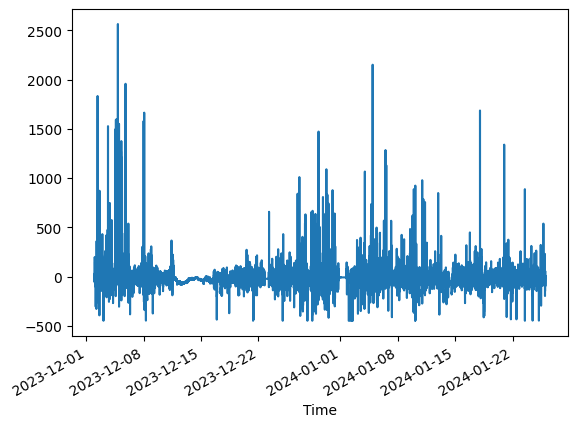

In [21]:
df_train[target_variable+"_lag1"].plot()

# Test data visualization

<Axes: xlabel='Time'>

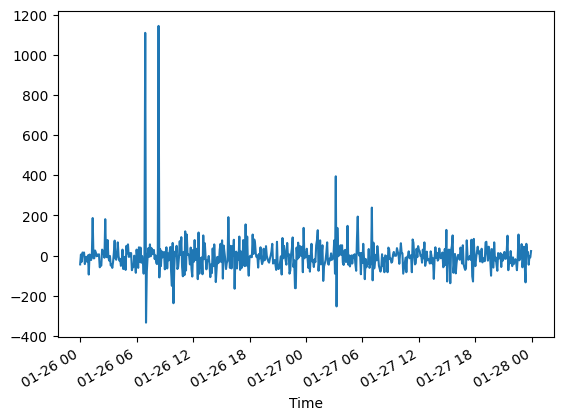

In [22]:
df_test[target_variable+"_lag1"].plot()

In [23]:
def data_preparation(df_base):
    df_base.fillna(0, inplace=True)
    X = df_base.drop(columns=[target_variable])
    y = df_base[target_variable]
    
    return X, y

In [24]:
X_train, y_train = data_preparation(df_train)
X_test, y_test = data_preparation(df_test)

In [25]:
reg = xgb.XGBRegressor(n_estimators=250, early_stopping_rounds=80)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=True) 

[0]	validation_0-rmse:99.85183	validation_1-rmse:63.18011
[1]	validation_0-rmse:95.01645	validation_1-rmse:63.20499
[2]	validation_0-rmse:91.60870	validation_1-rmse:63.23586
[3]	validation_0-rmse:89.34235	validation_1-rmse:63.31680
[4]	validation_0-rmse:87.77178	validation_1-rmse:63.33833
[5]	validation_0-rmse:86.56331	validation_1-rmse:63.30520
[6]	validation_0-rmse:84.89147	validation_1-rmse:63.33897
[7]	validation_0-rmse:82.82595	validation_1-rmse:64.12478
[8]	validation_0-rmse:82.14315	validation_1-rmse:64.08158
[9]	validation_0-rmse:80.50371	validation_1-rmse:69.36139
[10]	validation_0-rmse:79.29688	validation_1-rmse:69.27156
[11]	validation_0-rmse:78.85310	validation_1-rmse:69.73600
[12]	validation_0-rmse:77.69496	validation_1-rmse:69.67464
[13]	validation_0-rmse:76.98079	validation_1-rmse:69.74071
[14]	validation_0-rmse:76.43384	validation_1-rmse:70.09868
[15]	validation_0-rmse:75.46231	validation_1-rmse:70.10232
[16]	validation_0-rmse:75.12527	validation_1-rmse:70.33723
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=80,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
X_train.index.max()

Timestamp('2024-01-25 23:55:01')

In [27]:
target_var_seq = df_final[target_variable]
target_var_seq

Time
2023-12-01 00:00:01   -36.694695
2023-12-01 00:05:01    -3.461731
2023-12-01 00:10:01     8.097565
2023-12-01 00:15:01     8.097565
2023-12-01 00:20:01     8.097565
                         ...    
2024-01-27 23:35:01    28.326326
2024-01-27 23:40:01    55.779648
2024-01-27 23:45:01    36.995796
2024-01-27 23:50:01    21.101768
2024-01-27 23:55:01   -35.249786
Name: 1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U, Length: 16709, dtype: float64

In [28]:
predictions = reg.predict(X_test)
# all_df = pd.concat([predictions, target_var_seq], sort=False)
predictions

array([ -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,
        -7.4496727,  -7.4496727,  -7.4496727,  -7.4496727,  -7.4

In [29]:
X_test['Preds'] = predictions
X_test

,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag1,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag2,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag3,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag4,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag5,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag6,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag7,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag8,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag9,1023-115-201-GAZO-0001-GCP1/G_BB02_PIA03/FurOverpressure.U_lag10,...,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag3,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag4,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag5,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag6,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag7,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag8,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag9,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag10,1023-113-201-PECH-0001-SAF1_FUR/Furnace$Charging/WghtLssCalcTab.KGpMinSPBin8Inn_lag11,Preds
Time,,,,,,,,,,,,,,,,,,,,,
2024-01-26 00:00:01,-43.919250,28.326326,-32.359962,-6.351551,-59.813278,63.004204,39.885620,0.873005,-25.135406,-35.249786,...,111.347031,0.000000,108.060059,109.177979,108.491135,108.191635,127.317169,100.845070,108.253548,-7.449673
2024-01-26 00:05:01,5.207741,-30.915047,76.008408,-0.571907,-67.037842,-2.016819,-17.910843,44.220352,-36.694695,12.432297,...,110.632172,0.000000,107.600815,108.342430,107.925888,108.214844,127.509590,100.508133,107.698845,-7.449673
2024-01-26 00:10:01,-30.915047,77.453323,-114.719925,-7.796463,-59.813278,8.097565,64.449112,-82.931870,-20.800667,13.877209,...,110.546349,0.000000,109.213348,108.491165,108.065216,107.876862,126.399582,100.682945,109.631058,-7.449673
2024-01-26 00:15:01,15.322121,-22.245583,50.000000,-7.796463,-29.470139,-90.156418,-9.241375,138.139618,48.555088,44.220352,...,110.915230,0.000000,110.360268,107.949120,108.253548,107.982651,127.681175,100.222740,108.191635,-7.449673
2024-01-26 00:20:01,10.987389,34.105972,15.322121,104.906639,-3.461731,-74.262398,48.555088,-13.576111,18.211945,-39.584518,...,109.709999,58.081196,109.631035,106.801018,107.698845,110.034653,127.249596,100.187744,108.214844,-7.449673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-27 23:35:01,18.211945,213.275009,-68.482750,54.334736,102.016815,115.021019,116.465935,-74.262398,44.220352,-97.380981,...,119.938454,125.794563,127.289871,126.649551,127.343063,63.466602,108.214844,63.780266,127.776329,-7.449673
2024-01-27 23:40:01,-45.364166,-100.270813,-28.025223,-9.241375,34.105972,185.821686,-81.486954,31.216148,-82.931870,44.220352,...,120.763161,127.259468,127.137863,126.386215,126.849091,39.306568,107.876862,65.814667,127.403862,-7.449673
2024-01-27 23:45:01,-2.016819,102.016815,-124.834305,36.995796,5.207741,-81.486954,-17.910843,80.343140,138.139618,25.436502,...,119.170532,127.996681,127.700226,128.148651,125.777504,25.216043,107.982651,107.416855,102.281418,-7.449673


In [30]:
all_df = pd.concat([X_test, df_final])

<Axes: xlabel='Time'>

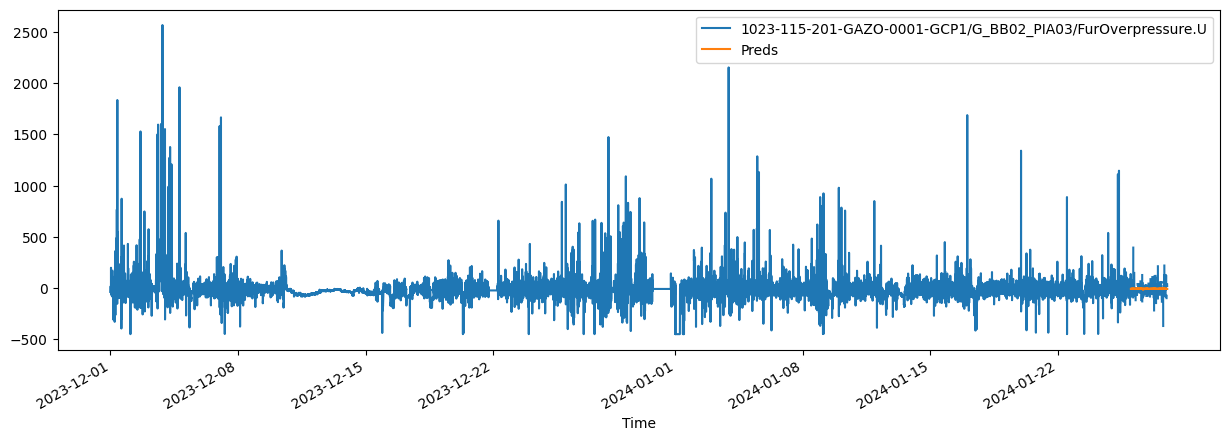

In [31]:
all_df[[target_variable,'Preds']].plot(figsize=(15, 5))

<Axes: xlabel='Time'>

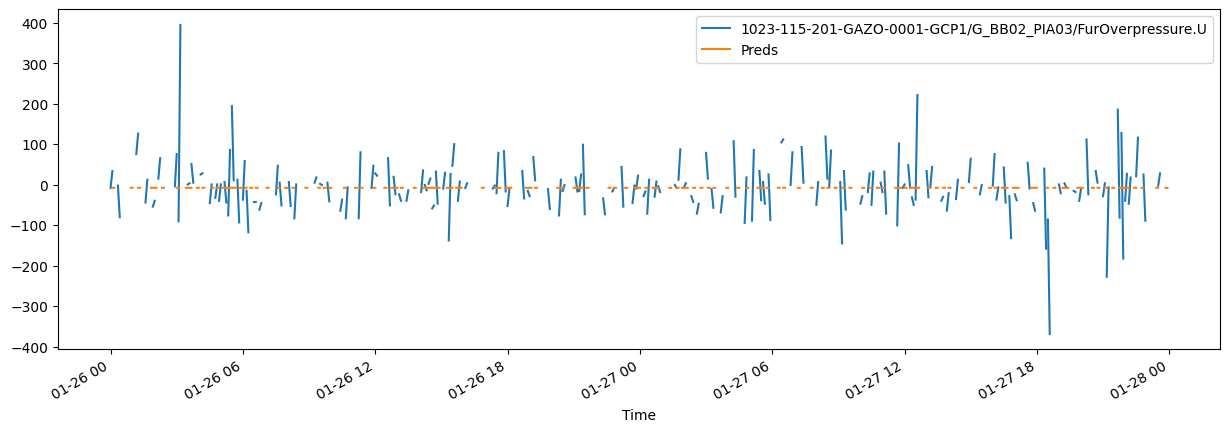

In [32]:
split_date = '26-Jan-2024'
comparison = all_df.loc[all_df.index > split_date].copy() 
comparison[[target_variable,'Preds']].plot(figsize=(15, 5))

<Axes: xlabel='Time'>

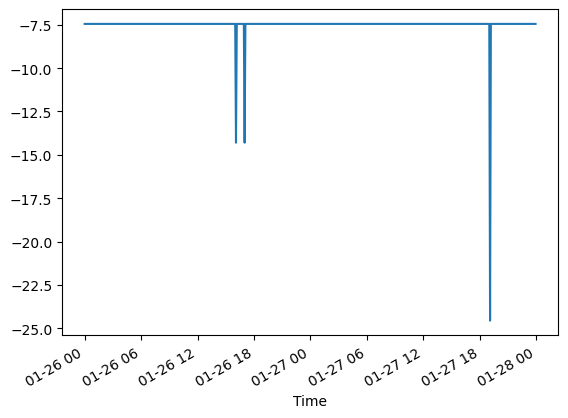

In [33]:
X_test['Preds'].plot()

<Axes: xlabel='Time'>

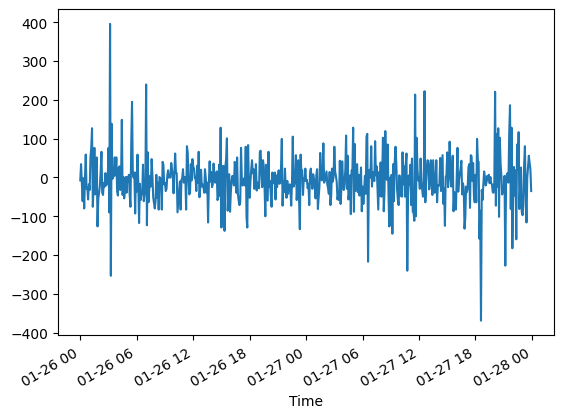

In [34]:
split_date = '26-Jan-2024'
df_final = df_final.loc[df_final.index > split_date].copy() 

df_final[target_variable].plot()